### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

The independent variable is whether or not the words are congruent (i.e., have matching text and ink color). The dependent variable is the time it takes for the participant to correctly state the ink colors of the listed words (equally sized).

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

An appropriate Null hypothesis is that word congruency has **no effect** on the average time it takes for participants to correctly state the ink colors of the listed words. The alternative hypothesis is that word congruency **does have an effect** on the average time it takes for participants to correctly state the ink colors of the listed words. The hypotheses are listed mathematically below:

$$ H_0: \mu_{incongruent} - \mu_{congruent} = 0  $$
$$ H_1: \mu_{incongruent} - \mu_{congruent} \neq 0$$

We will perform a hypothesis test below in order determine if we should reject, or fail to reject the Null hypothesis based on the observed data. A hypothesis test is appropriate as it allows us to determine the probability of our observed statistic occuring, assuming the null hypothesis is true. In this case the observed statistics will be the diffenece in mean time taken to correctly state the ink colors of the listed words for the congruent and incongruent lists. Based on the selected Type 1 error threshold (I will use $\alpha= 0.05$), we can then infer (based on the data we have) whether or not we should reject, or fail to reject the Null hypothesis.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [3]:
# read in the data
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
df.describe() 

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [5]:
# get means
mean_congruent = np.mean(df.Congruent)
mean_incongruent = np.mean(df.Incongruent)

mean_congruent, mean_incongruent

(14.051124999999999, 22.015916666666666)

In [6]:
# get medians
median_congruent = np.median(df.Congruent)
median_incongruent = np.median(df.Incongruent)

median_congruent, median_incongruent

(14.3565, 21.017499999999998)

In [7]:
# get standard deviations
stdev_congruent = np.std(df.Congruent)
stdev_incongruent = np.std(df.Incongruent)

stdev_congruent, stdev_incongruent

(3.4844157127666331, 4.6960551345133172)

The mean and median time it took participants to correctly state the colors of the congruent word list were 14.05 and 14.36 seconds respectively. The mean and median time it took participants to correctly state the colors of the incongruent word list were 22.02 and 21.02 seconds respectively.

The standard deveiation of time taken for the congruent words was 3.48 seconds. The standard deveiation of time taken for the congruent words was 4.70 seconds.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

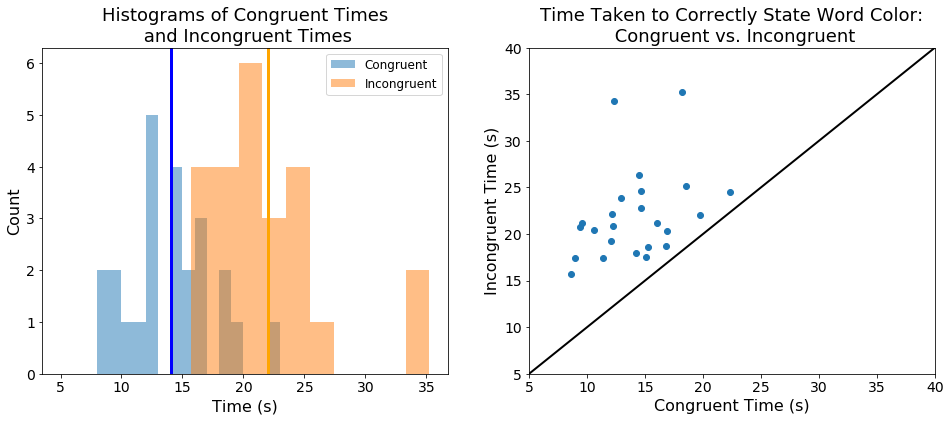

In [18]:
from matplotlib.lines import Line2D

# initiate figure with 2 axis abjects for subplot
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6))

#### plot overlapping histograms ####
ax0.hist(df.Congruent, alpha=0.5, bins=range(5,35,1))
ax0.hist(df.Incongruent, alpha=0.5);

# plot sample means as vertical lines
ax0.axvline(mean_congruent, linewidth=3, color='blue')
ax0.axvline(mean_incongruent, linewidth=3, color='orange')

# clean up plot
ax0.tick_params(labelsize=14)
ax0.set_xlabel('Time (s)', fontsize=16)
ax0.set_ylabel('Count', fontsize=16)
ax0.legend(loc='upper right', fontsize=12);
ax0.set_title('Histograms of Congruent Times\n and Incongruent Times', fontsize=18);

#### scatter plot ####
ax1.scatter(df.Congruent, df.Incongruent)
l = Line2D([5,40],[5,40], linewidth=2, color='black')
ax1.add_line(l)

# clean up plot
ax1.tick_params(labelsize=14)
ax1.set_xlim(5,40)
ax1.set_ylim(5,40)
ax1.set_xlabel('Congruent Time (s)', fontsize=16)
ax1.set_ylabel('Incongruent Time (s)', fontsize=16);
ax1.set_title('Time Taken to Correctly State Word Color:\n Congruent vs. Incongruent', fontsize=18);

Based on the histograms (left) above we can see that there is some overlap between the some of the participants response times in the congruent and incongruent groups. However, the means (shown by vertical lines) show that there is some noticeable difference in the average time taken by each group as well.

From the scatter (right) we can see that all of the participant in our sample took longer to state the correct colors of the incongruent word list when compared to the congruent list. This is easy to identify using the 1:1 line.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [19]:
# compute observed difference in average response times
obs_diff = mean_incongruent - mean_congruent
obs_diff

7.9647916666666667

In [20]:
# create sampling distribution of difference in average 
# response time with bootstrapping
diffs = []
for _ in range(10000):
    congruent_mean = df.Congruent.sample(df.shape[0],replace=True).mean()
    incongruent_mean = df.Incongruent.sample(df.shape[0],replace=True).mean()
    diffs.append(incongruent_mean - congruent_mean)

In [21]:
# convert to numpy array
diffs = np.array(diffs)

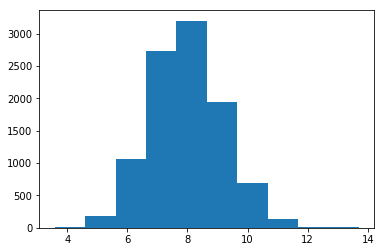

In [22]:
# plot sampling distribution
plt.hist(diffs);

In [23]:
np.std(diffs)

1.2116472840994217

In [28]:
# simulate distribution under the null hypthesis
null_vals = np.random.normal(0, np.std(diffs), diffs.shape)

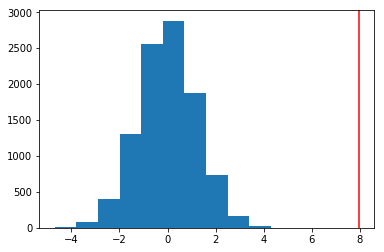

In [29]:
# plot null distribution
plt.hist(null_vals)

# plot observed difference
plt.axvline(obs_diff, color = 'red');

In [30]:
null_mean = 0

# compute p value
pval = (null_vals > obs_diff).mean()
                         
pval

0.0

A p-value of 0.0 stongly supports rejecting the Null hypothesis, and that in fact word congruency has a statistically significant effect on the average reponse time of participants in the stroop task.

As a secondary test (and to check my work), I will compute the t-value and p-value using the paired t-test. I am confident the work above is correct, but running the t-test is easy using scipy, as shown below.

In [31]:
from scipy import stats

# Write you code here to perform the t-test
(t_val, p_val) = stats.ttest_rel(df.Incongruent, df.Congruent)
t_val, p_val

(8.020706944109957, 4.1030005857111781e-08)

The result of the t-test also shows an extremely small p-value (0.00000004), which also supports rejecting the Null hypothesis. 

Based on the results of this analysis, we can be confident that word congruency (ink color match actual word) **does have an effect** on the average response time of participants to state the correct ink color. We reject the Null hypothesis. 

Based on [*Neuroscience For Kids*](https://faculty.washington.edu/chudler/neurok.html), maintained by Eric H. Chudler, Ph.D, but perfectly suitable for our brief research purposes, there are two theories for the cause of the Stroop effect:

>1. Speed of Processing Theory: the interference occurs because words are read faster than colors are named.
>2. Selective Attention Theory: the interference occurs because naming colors requires more attention than reading words.

I would be interested to test whether or not the confusion occurs with **ANY** word/color incongruency. For example, if the words were animals but the subject was still asked to identify the text color, would they find themselves stating "dog" or "cat" instead of the color? Do our minds weight what we process through the act of reading more important than the colors that we actually see, even when we are directed to state the colors? Do we only have trouble when the color and the context of what we are reading directly confilct, or is there a deeper mental conflcit suggesting that once we acquire the skill of reading our minds begin to weight the importance of that process more than others? These questions seem appropriate for another experiment and a corresponding hypothesis tests, after which we could infer the significance of the results.